# Estimator API: Dimensionsreduktion der Iris Daten (unsupervised)
[Video](https://mstream.hm.edu/paella/ui/watch.html?id=36a89593-80cb-45bd-8c5f-d4e9cbe7943a)

In [1]:
%matplotlib inline
import seaborn as sns; sns.set()

Die Iris Daten sind vierdimensional und damit schwer zu visualisieren.
Können diese auf zwei (wesentliche) Dimensionen reduziert werden?
Verwende Principal Component Analysis (PCA): *Wir verwenden hier nur die vierdimensionalen Daten, die Labels werden NICHT verwendet.*

## 1. Wähle Modellklasse

In [2]:
from sklearn.decomposition import PCA

## 2. Wähle Modellparameter

In [3]:
PCA?

Init signature:
PCA(
    n_components=None,
    *,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    random_state=None,
)
Docstring:     
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the
truncated SVD.

Notice that this class does not support sparse input. See
:class:`TruncatedSVD` for an alternative with sparse data.

Read more in the :ref:`User Guide <PCA>`.

Parameters
----------
n_components : int, float or 'mle', default=None
    Number of components to keep.
    if n_componen

In [4]:
model = PCA(n_components=2)

## 3. Bereite Daten vor

In [5]:
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

## 4. Passe das Modell an die Daten an

In [6]:
model.fit(X_iris)

PCA(n_components=2)

## 5. Wende das Modell auf neue Daten an

In disesem *unsupervised* Fall heißt das: Transformiere die Daten auf die neu gelernten wichtigen Dimensionen.

In [7]:
X_2D = model.transform(X_iris)
X_2D

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

Visualisiere das Ergebnis:

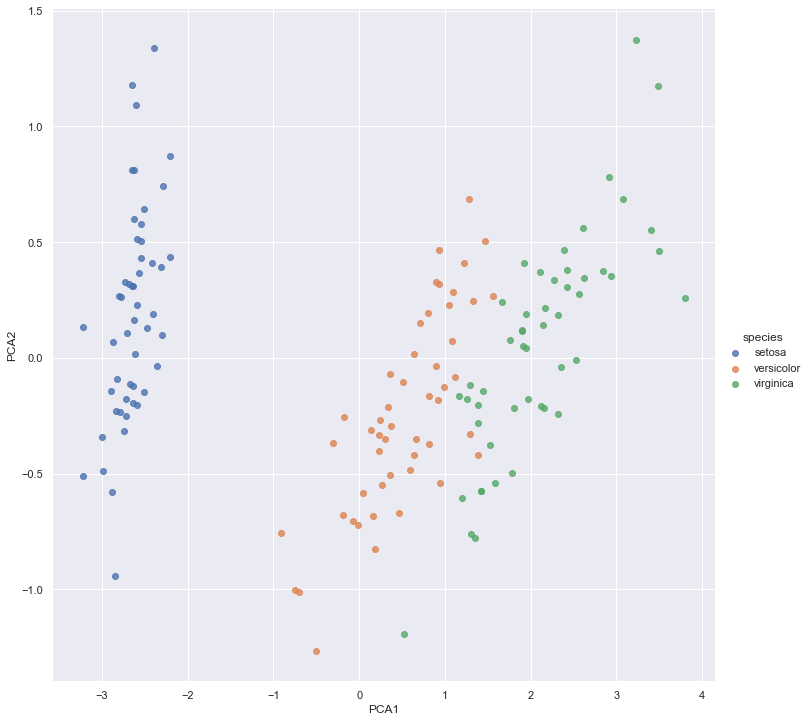

In [8]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False, height=10);

Sieht aus, als ob sich diese Daten gut clustern lassen...